# Temperature Forecast Project using ML


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df =  pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [4]:
df.head(20)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0       1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1       2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2       3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3       4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4       5.0  30-06-2013          31.4          21.9    56.174095    90.155128   
5       6.0  30-06-2013          31.9          23.5    52.437126    85.307251   
6       7.0  30-06-2013          31.4          24.4    56.287189    81.019760   
7       8.0  30-06-2013          32.1          23.6    52.326218    78.004539   
8       9.0  30-06-2013          31.4          22.0    55.338791    80.784607   
9      10.0  30-06-2013          31.6          20.5    56.651203    86.849632   
10     11.0  30-06-2013          31.7          23.5    51.156395    85.385635   
11     12.0  30-06-2013          31.6          22.2    51.288349    80.338013   
12     13.0  30-06-2013          32.1          23.8    48.767929    84.008163   
13     14.0  30-06-2013          31.3          23.8    50.745735    74.498810   
14     15.0  30-06-2013          32.5          23.6    51.773392    72.999237   
15     16.0  30-06-2013          30.7          21.4    56.848339    84.408173   
16     17.0  30-06-2013          32.1          20.1    54.352501    93.218315   
17     18.0  30-06-2013          32.8          23.8    56.144707    88.364731   
18     19.0  30-06-2013          31.4          22.8    52.265926    75.483757   
19     20.0  30-06-2013          30.9          22.2    61.493835    95.245232   

    LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0          28.074101         23.006936  6.818887   69.451805  ...         0.0   
1          29.850689         24.035009  5.691890   51.937448  ...         0.0   
2          30.091292         24.565633  6.138224   20.573050  ...         0.0   
3          29.704629         23.326177  5.650050   65.727144  ...         0.0   
4          29.113934         23.486480  5.735004  107.965535  ...         0.0   
5          29.219342         23.822613  6.182295   50.231389  ...         0.0   
6          28.551859         24.238467  5.587135  125.110007  ...         0.0   
7          28.851982         23.819054  6.104417   42.011547  ...         0.0   
8          28.426975         23.332373  6.017135   85.110971  ...         0.0   
9          27.576705         22.527018  6.518841   63.006075  ...         0.0   
10         29.694724         24.432646  6.411812   55.690312  ...         0.0   
11         28.936314         24.365949  6.423993   28.719288  ...         0.0   
12         29.929272         24.281750  5.988361   32.039448  ...         0.0   
13         29.498526         24.459427  6.319478   16.835611  ...         0.0   
14         29.640103         25.152909  6.360547   32.275122  ...         0.0   
15         28.476517         23.695151  5.639549   83.417605  ...         0.0   
16         29.321525         23.036163  5.497787   97.971438  ...         0.0   
17         28.676175         23.448165  5.665435   81.938271  ...         0.0   
18         29.273668         24.970151  6.359286   36.339969  ...         0.0   
19         28.502989         23.031539  6.814792   70.166936  ...         0.0   

    LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0          0.0         0.0  37.6046  126.991  212.3350  2.7850   
1          0.0         0.0  37.6046  127.032   44.7624  0.5141   
2          0.0         0.0  37.5776  127.058   33.3068  0.2661   
3          0.0         0.0  37.6450  127.022   45.7160  2.5348   
4          0.0         0.0  37.5507  127.135   35.0380  0.5055   
5          0.0         0.0  37.5102  127.042   54.6384  0.1457   
6          0.0         0.0  37.5776  126.838   12.3700  0.0985   
7          0.0         0.0  37.4697  126.910   52.5180  1.5629   
8     

In [5]:
df.tail(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7742     18.0  30-08-2017          23.3          18.2    30.259682   
7743     19.0  30-08-2017          22.6          15.0    25.536045   
7744     20.0  30-08-2017          22.7          15.9    38.216373   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7742    86.565193         26.474403         17.289157   6.522731   94.203783   
7743    78.779045         26.596280         17.856040   6.905963   54.030075   
7744    94.428116         24.037222         15.772677   6.478060  112.580310   
7745    78.261383         27.812697         18.303014   6.603253    9.614074   
7746    83.690018         26.704905         17.814038   5.768083   82.146707   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7742  ...    0.000000    0.000000    0.000000  37.4832  127.024   56.4448   
7743  ...    0.000000    0.000000    0.000000  37.5776  126.938   75.0924   
7744  ...    0.000000    0.000000    0.000000  37.6181  127.004  146.5540   
7745  ...    0.000000    0.000000    0.000000  37.5507  127.040   26.2980   
7746  ...    0.000000    0.000000    0.000000  37.5102  127.086   21.9668   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7742  1.231300      4435.611816       27.8       16.7  
7743  1.767800      4495.473633       27.1       16.6  
7744  4.729600      4554.965332       26.7       16.3  
7745  0.572100      4456.024414       27.6       17.7  
7746  0.133200      4441.803711       28.0       17.1  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[10 rows x 25 columns]

In [6]:
df.sample()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2036     12.0  19-07-2014          29.4          23.1    51.905716   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  \
2036    88.977432         30.923026         24.235552  7.054048  27.010743   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  \
2036  ...         0.0         0.0         0.0  37.5507  126.988  132.118   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
2036  0.5931      5719.299805       32.2       22.9  

[1 rows x 25 columns]

# EDA (Exploratory Data Analysis)¶

In [7]:
df.shape

(7752, 25)

In [8]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [9]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [10]:
df.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [12]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [13]:
df.isnull().sum().sum()

1248

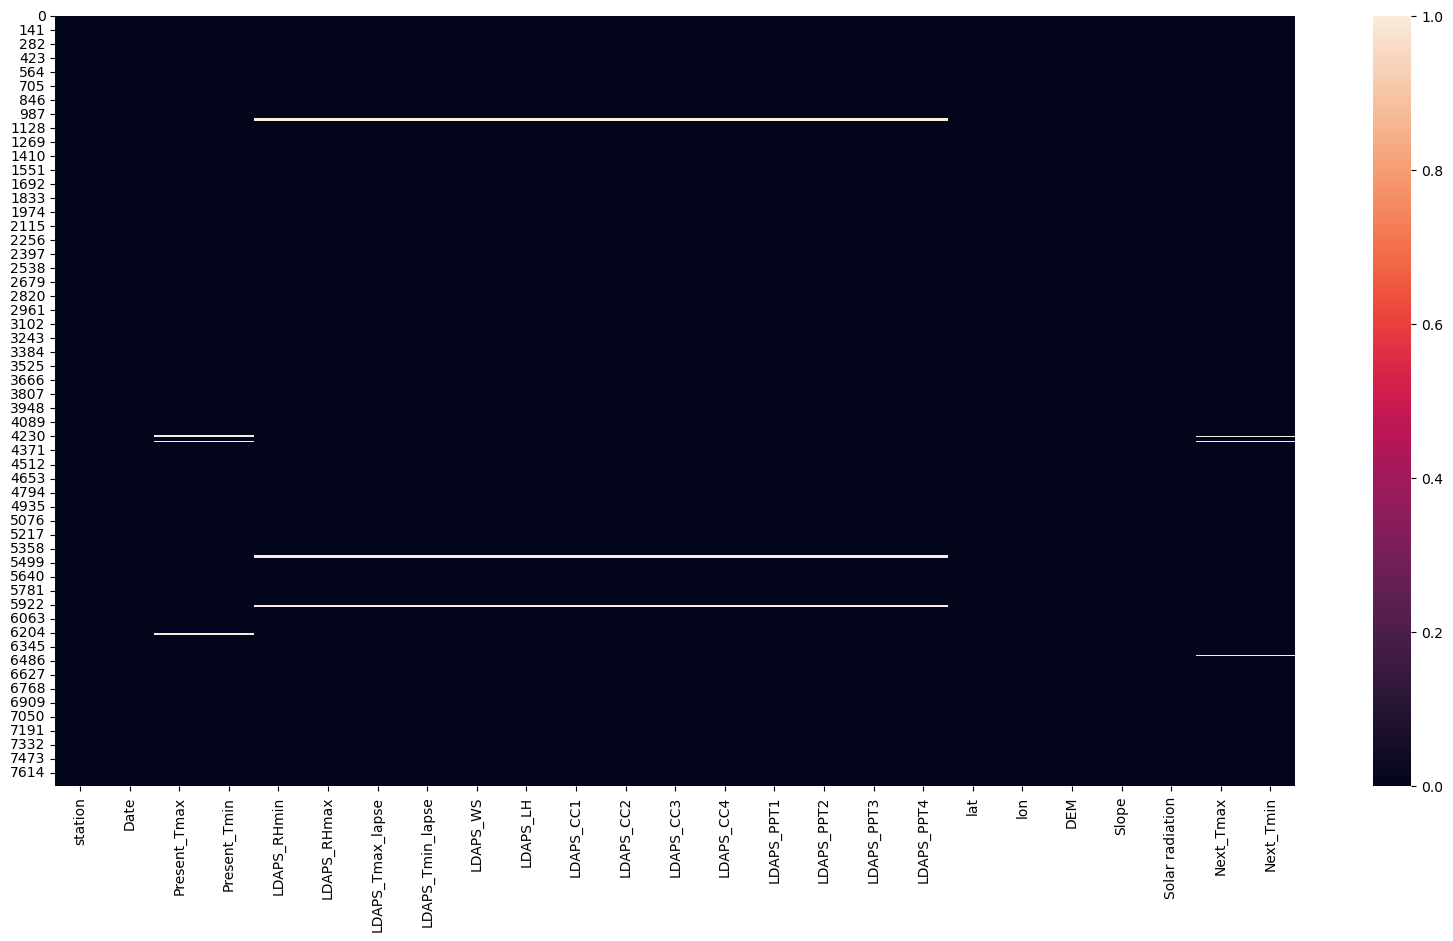

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

In [15]:
df.replace(np.nan,0, inplace = True)
df.tail(15)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7737     13.0  30-08-2017          23.8          17.1    28.521656   
7738     14.0  30-08-2017          23.1          17.2    21.468115   
7739     15.0  30-08-2017          23.4          16.1    22.562298   
7740     16.0  30-08-2017          21.7          15.2    27.868839   
7741     17.0  30-08-2017          22.6          14.6    35.059216   
7742     18.0  30-08-2017          23.3          18.2    30.259682   
7743     19.0  30-08-2017          22.6          15.0    25.536045   
7744     20.0  30-08-2017          22.7          15.9    38.216373   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      0.0           0          20.0          11.3    19.794666   
7751      0.0           0          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7737    81.337837         27.094065         17.444269   5.693622   48.882029   
7738    74.958038         27.659242         18.721456   6.990299   17.905112   
7739    75.351555         27.451492         18.612977   7.041802   20.186169   
7740    85.979271         26.400334         17.217080   6.395609   82.487679   
7741    89.616730         26.112684         16.446214   5.147585  118.735384   
7742    86.565193         26.474403         17.289157   6.522731   94.203783   
7743    78.779045         26.596280         17.856040   6.905963   54.030075   
7744    94.428116         24.037222         15.772677   6.478060  112.580310   
7745    78.261383         27.812697         18.303014   6.603253    9.614074   
7746    83.690018         26.704905         17.814038   5.768083   82.146707   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7737  ...    0.000000    0.000000    0.000000  37.5776  127.083   59.8324   
7738  ...    0.000000    0.000000    0.000000  37.4967  126.927   30.9680   
7739  ...    0.000000    0.000000    0.000000  37.5507  126.937   30.0464   
7740  ...    0.000000    0.000000    0.000000  37.4697  126.995   82.2912   
7741  ...    0.000000    0.000000    0.000000  37.6181  127.099   53.4712   
7742  ...    0.000000    0.000000    0.000000  37.4832  127.024   56.4448   
7743  ...    0.000000    0.000000    0.000000  37.5776  126.938   75.0924   
7744  ...    0.000000    0.000000    0.000000  37.6181  127.004  146.5540   
7745  ...    0.000000    0.000000    0.000000  37.5507  127.040   26.2980   
7746  ...    0.000000    0.000000    0.000000  37.5102  127.086   21.9668   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7737  2.686500      4434.277832       27.8       17.4  
7738  0.618000      4445.691406       27.5       17.2  
7739  0.855200      4470.393066       27.2       17.5  
7740  2.257900      4406.334473       25.9       15.7  
7741  0.697000      4460.537109       26.8       12.9  
7742  1.231300      4435.611816    

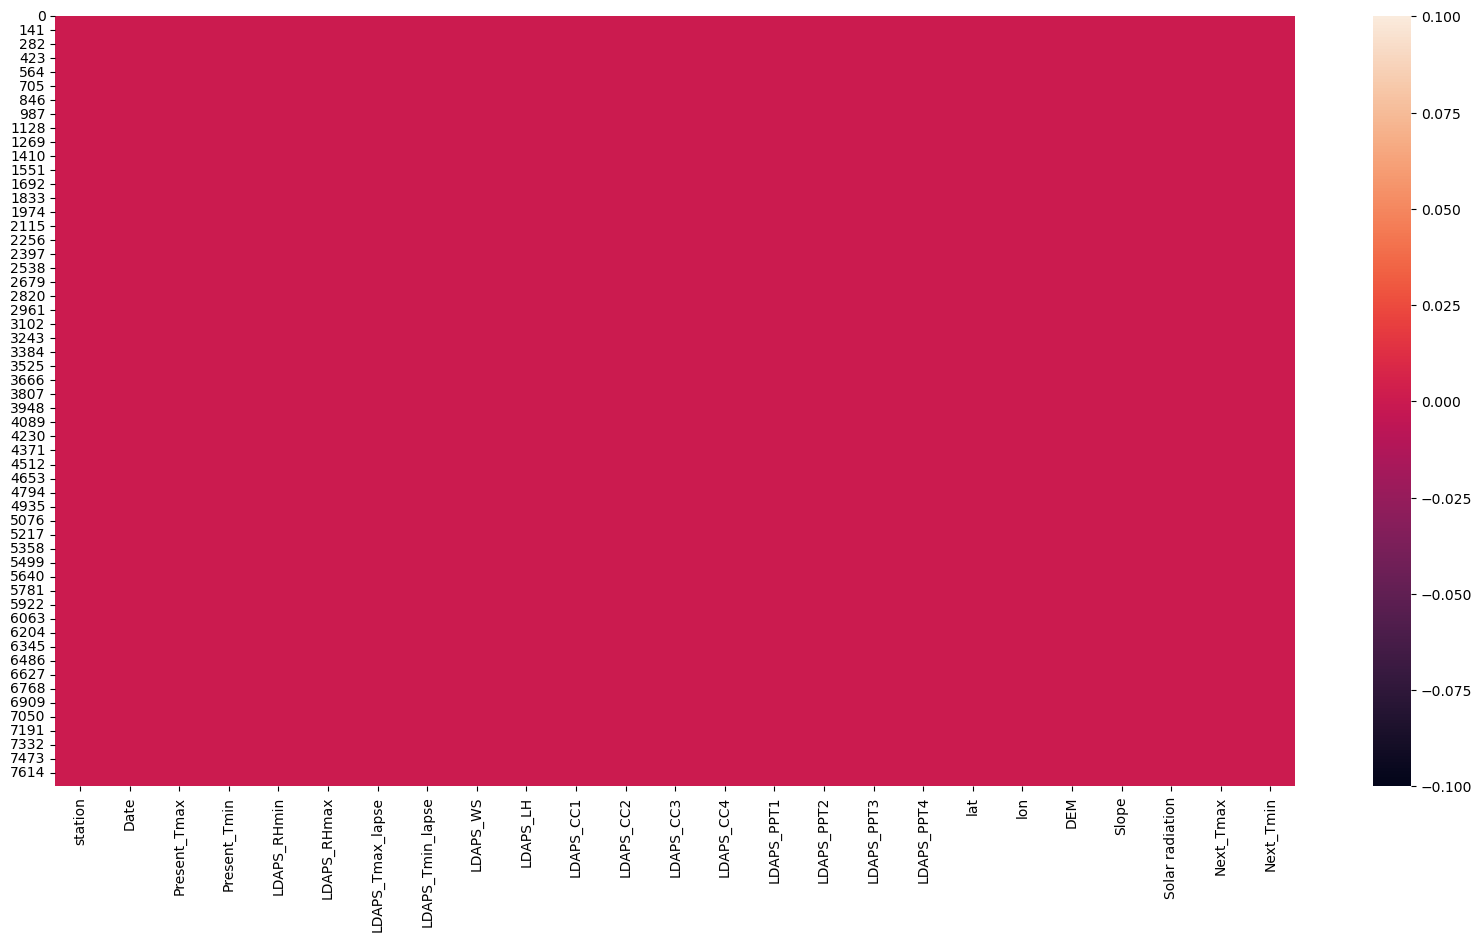

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

The Date column have object datatype lets adjust it first then go further 

In [17]:
df['Date']=pd.to_datetime(df['Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7752 non-null   float64       
 1   Date              7752 non-null   datetime64[ns]
 2   Present_Tmax      7752 non-null   float64       
 3   Present_Tmin      7752 non-null   float64       
 4   LDAPS_RHmin       7752 non-null   float64       
 5   LDAPS_RHmax       7752 non-null   float64       
 6   LDAPS_Tmax_lapse  7752 non-null   float64       
 7   LDAPS_Tmin_lapse  7752 non-null   float64       
 8   LDAPS_WS          7752 non-null   float64       
 9   LDAPS_LH          7752 non-null   float64       
 10  LDAPS_CC1         7752 non-null   float64       
 11  LDAPS_CC2         7752 non-null   float64       
 12  LDAPS_CC3         7752 non-null   float64       
 13  LDAPS_CC4         7752 non-null   float64       
 14  LDAPS_PPT1        7752 n

In [19]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     12.996646     29.499407     23.015338    56.210230    87.519784   
std       7.213660      4.083116      3.256071    15.618676    11.227876   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%       7.000000     27.700000     21.600000    45.735368    84.038809   
50%      13.000000     29.900000     23.400000    54.828714    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.326939         23.285106     7.029203    61.900288   
std            4.123757          3.277967     2.281613    34.120103   
min            0.000000          0.000000     0.000000   -13.603212   
25%           27.601014         22.032374     5.647741    36.776474   
50%           29.662273         23.735942     6.531345    56.487289   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.365206  ...     0.480310     0.275508     0.266801    37.544722   
std       0.263668  ...     1.754900     1.156495     1.200654     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.141643  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.312156  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571696  ...     0.016748     0.007231     0.000000    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.169440   
std       0.079435    54.279780     1.370444       429.158867     3.596114   
min     126.826000    12.370000     0.098475      4329.520508     0.000000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.852348  
std       2.827042  
min       0.000000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

# Data Visualization

Text(0.5, 1.0, 'Present Maximum Temperature for each Station')

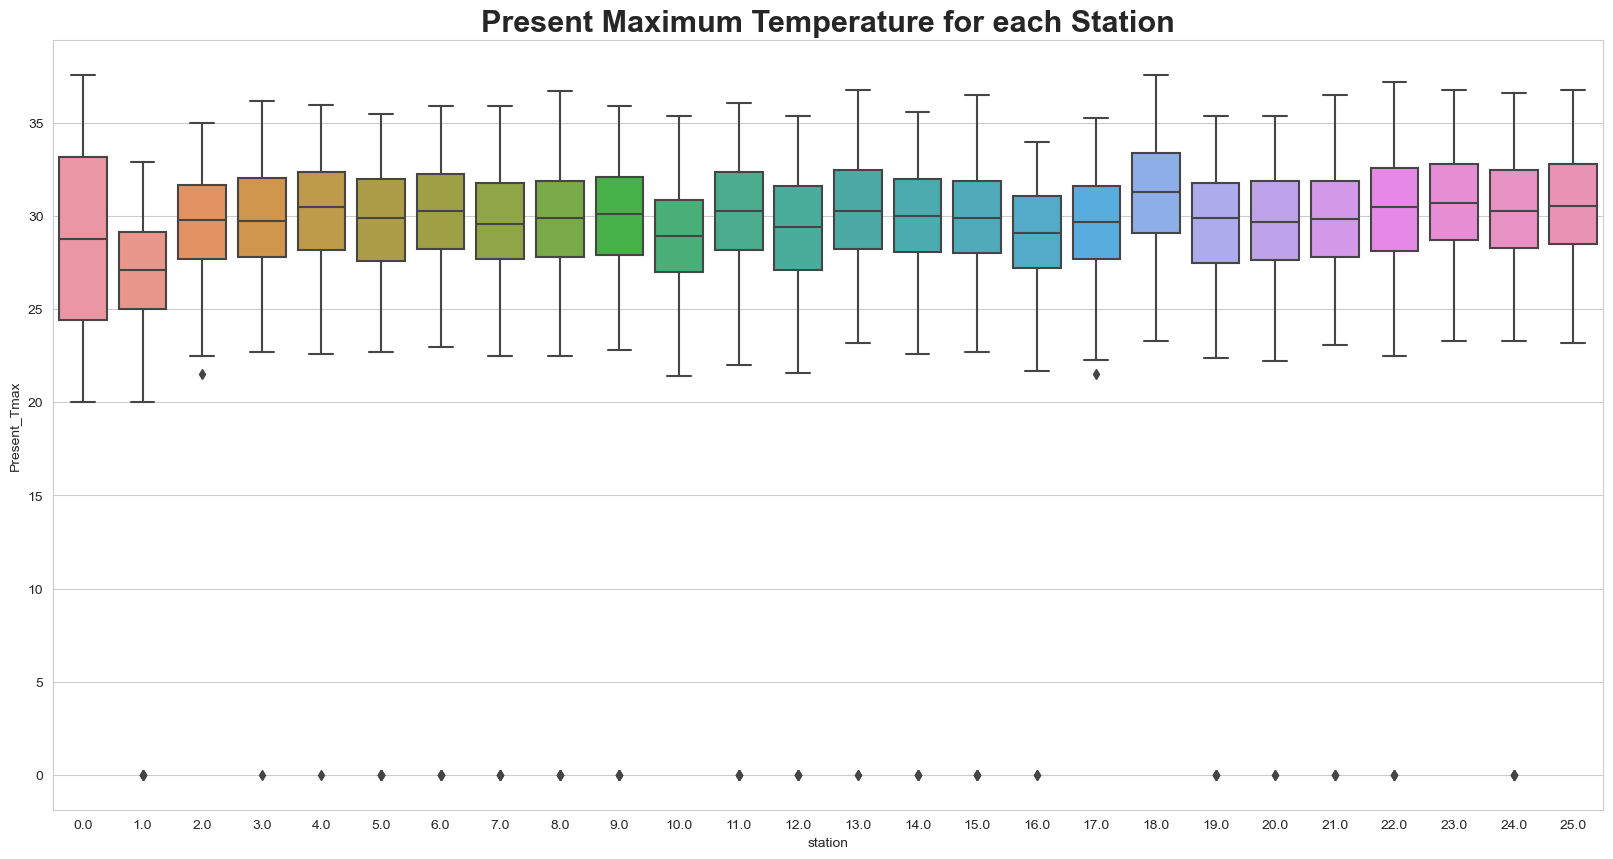

In [20]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.boxplot(x='station', y='Present_Tmax', data=df)
plt.title('Present Maximum Temperature for each Station', fontsize=22, fontweight='bold')


Text(0.5, 1.0, 'Present Minimum Temperature for each Station')

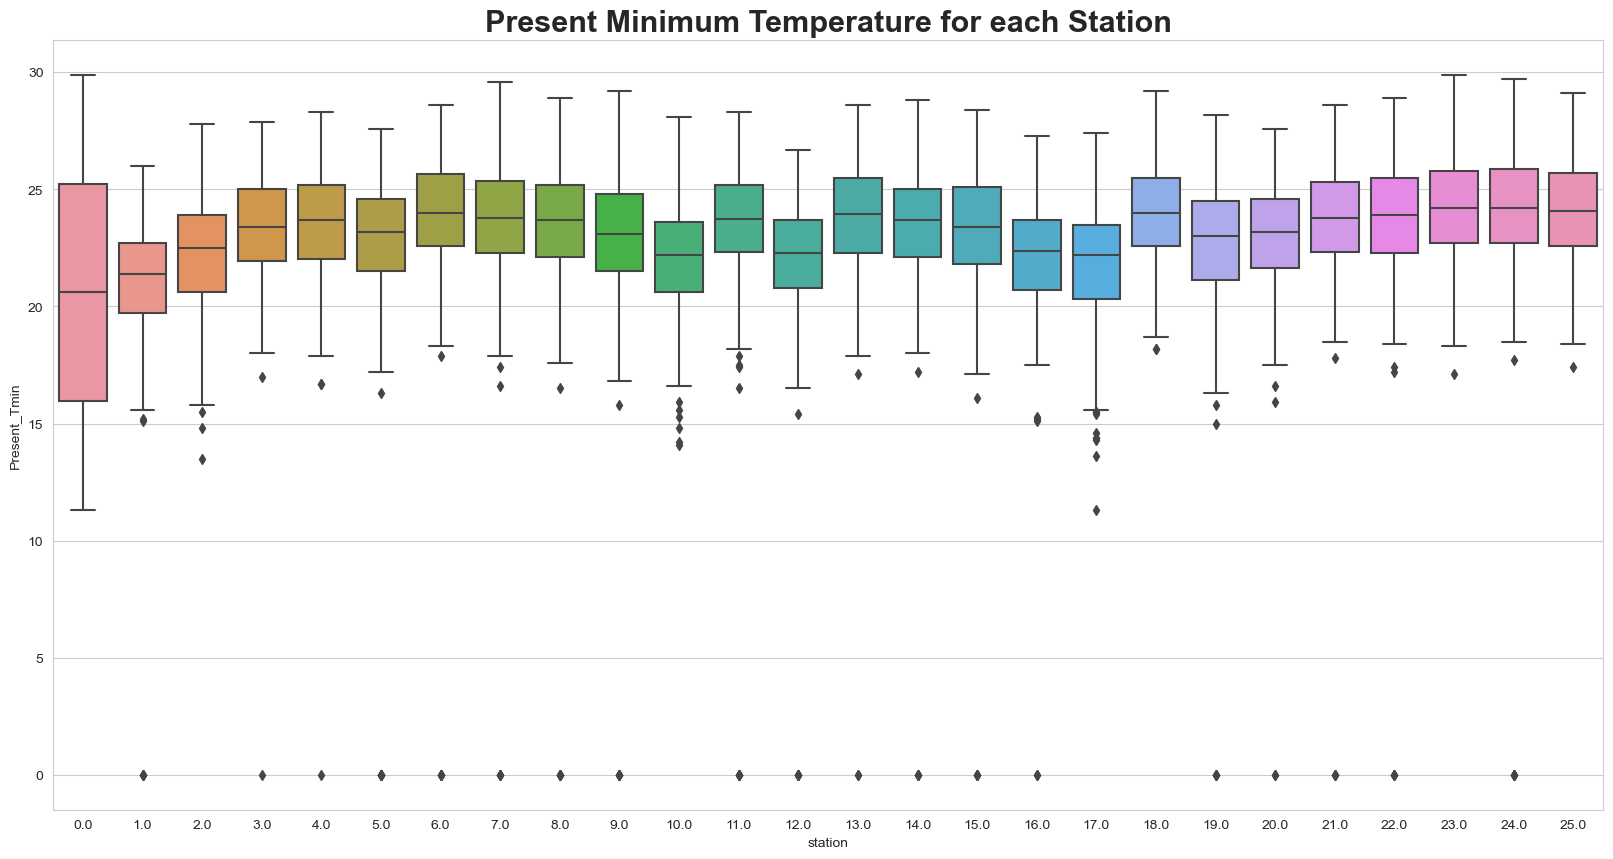

In [21]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.boxplot(x='station', y='Present_Tmin', data=df)
plt.title('Present Minimum Temperature for each Station', fontsize=22, fontweight='bold')


<Axes: xlabel='Next_Tmax', ylabel='Solar radiation'>

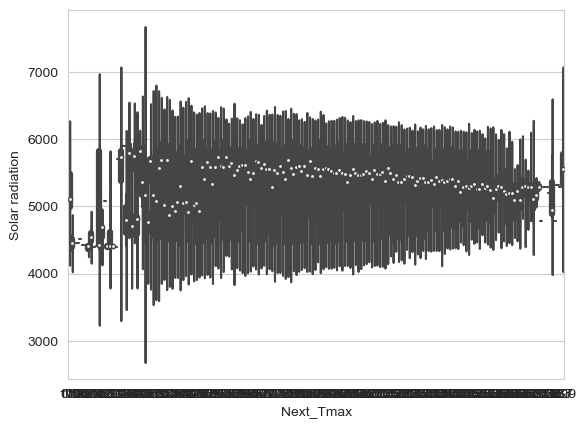

In [22]:
sns.violinplot(x=df['Next_Tmax'], y=df['Solar radiation'])

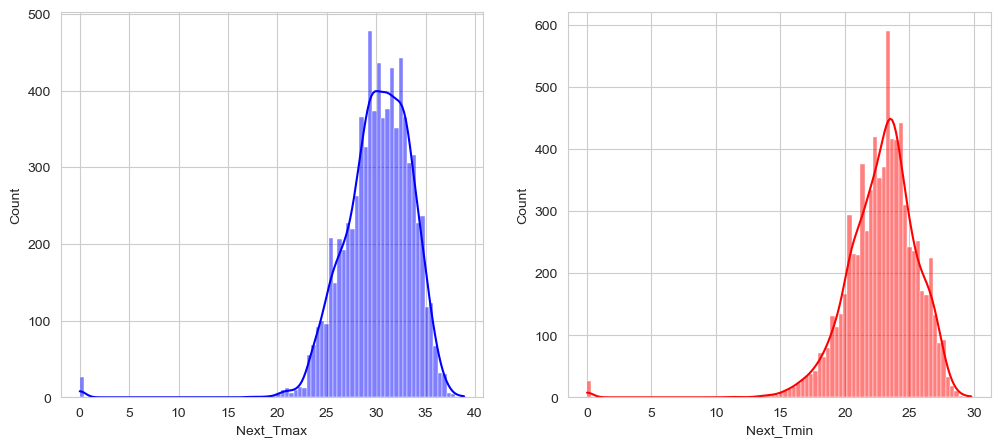

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='r')
plt.show()

# Next Maximum Temperature Vs Cloud cover

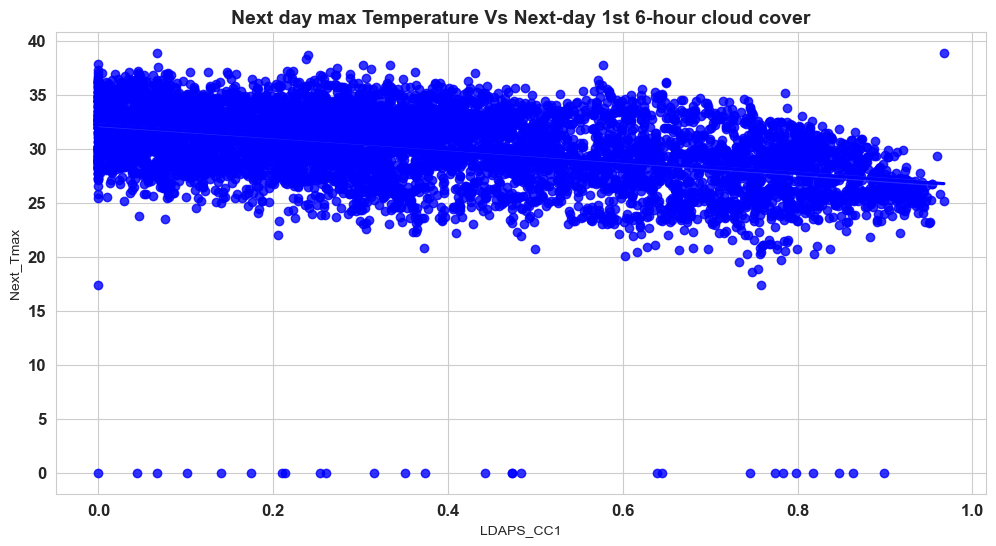

In [24]:

plt.figure(figsize=(12,6))

plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.regplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()



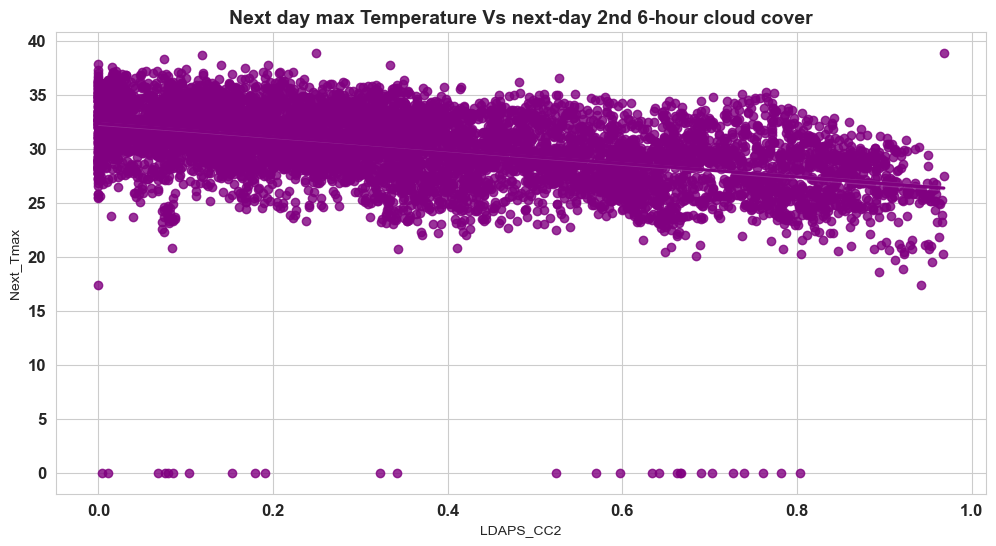

In [25]:
plt.figure(figsize=(12,6))
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.regplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

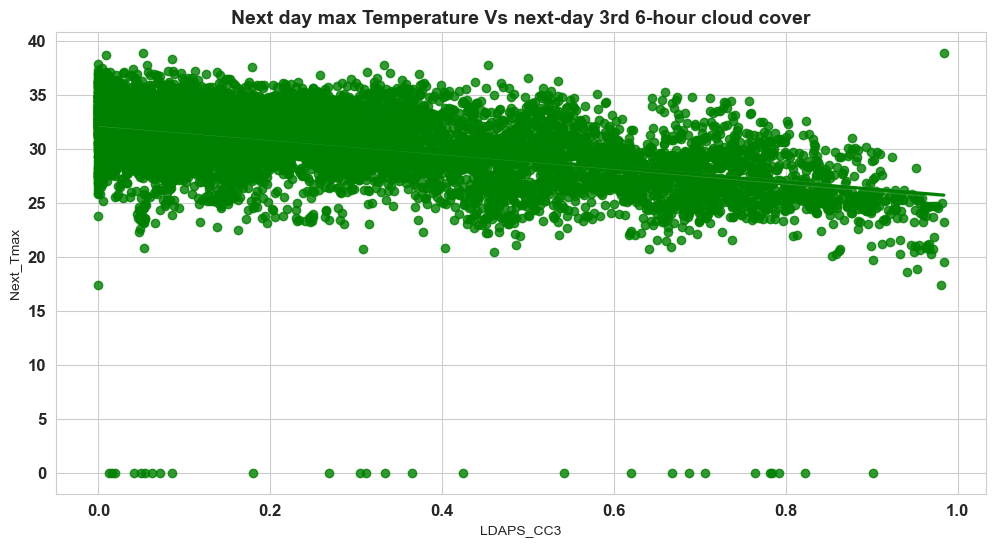

In [26]:
plt.figure(figsize=(12,6))
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.regplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

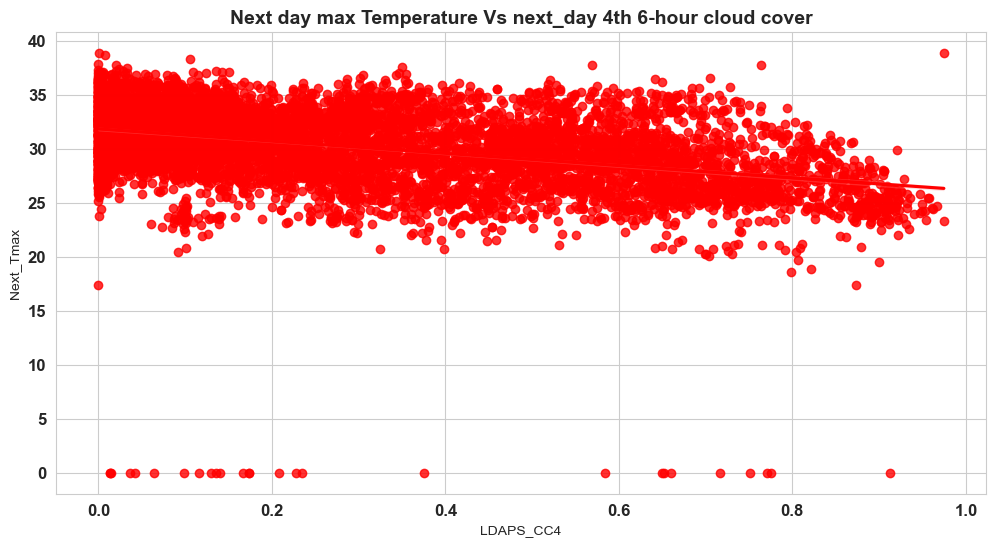

In [27]:
plt.figure(figsize=(12,6))
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.regplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

# Next Minimum Temperature Vs Cloud cover


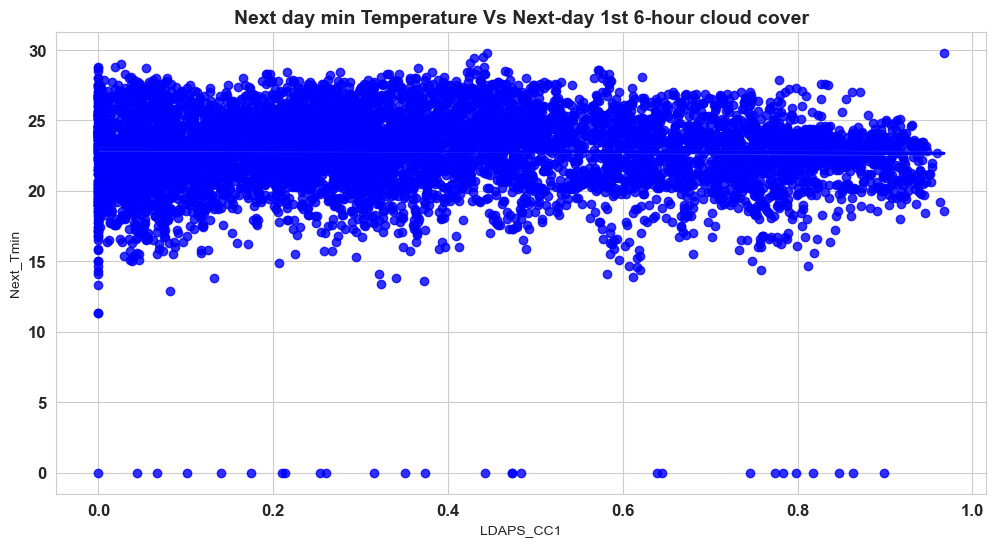

In [28]:
plt.figure(figsize=(12,6))

plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.regplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

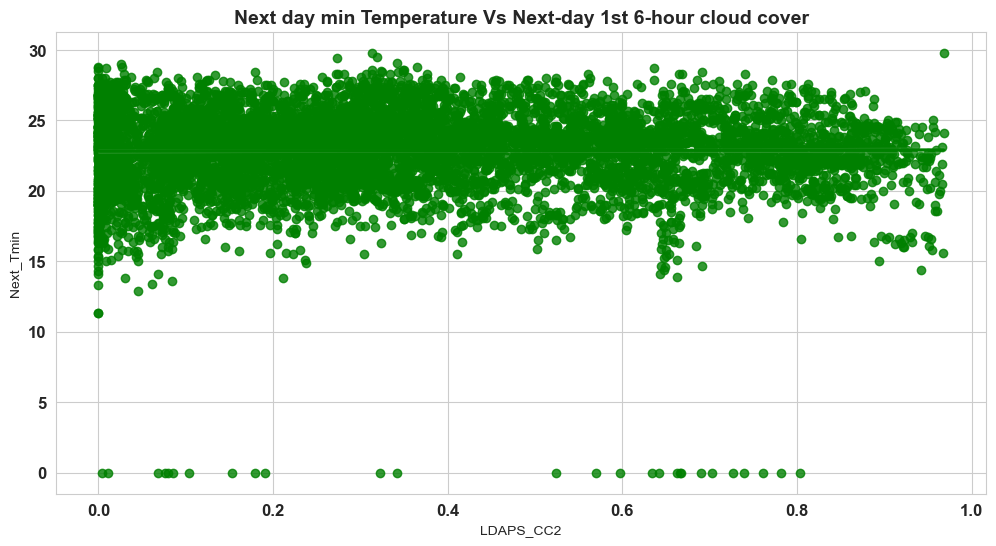

In [29]:
plt.figure(figsize=(12,6))

plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.regplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color="green")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

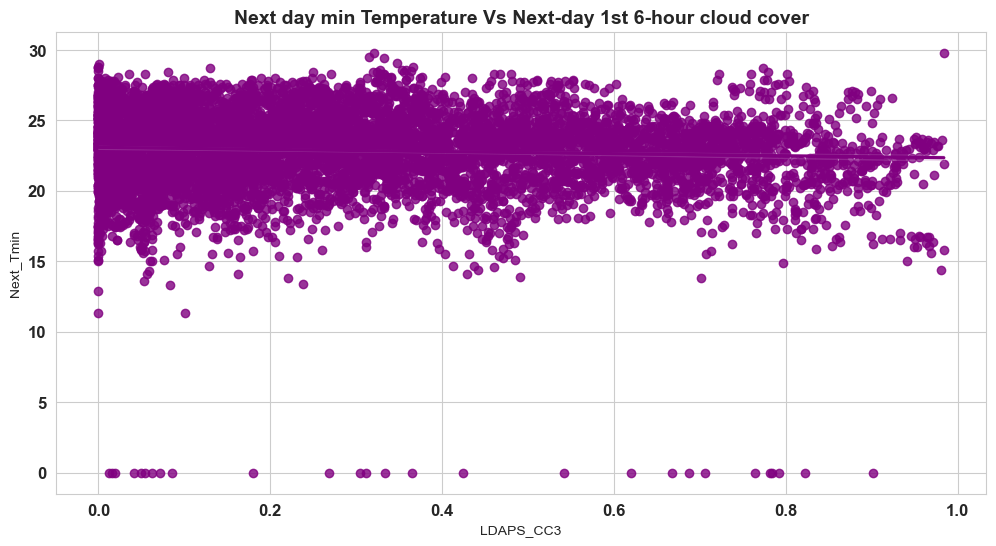

In [30]:
plt.figure(figsize=(12,6))

plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.regplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color="purple")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

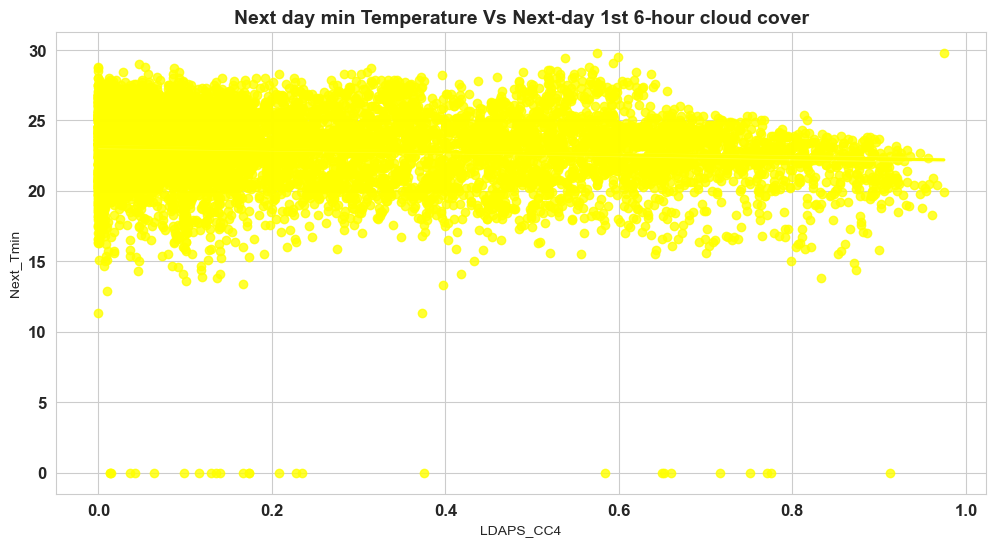

In [31]:
plt.figure(figsize=(12,6))

plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.regplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="yellow")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

# Solar Radiation Vs Cloud cover

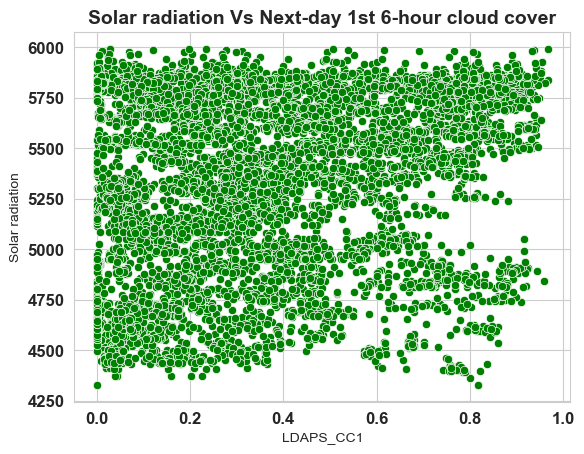

In [32]:
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

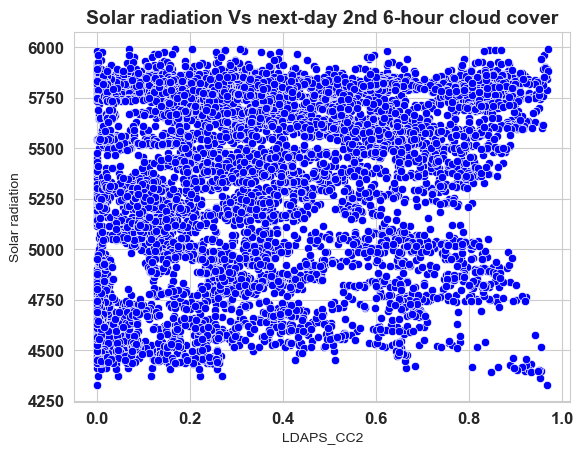

In [33]:
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

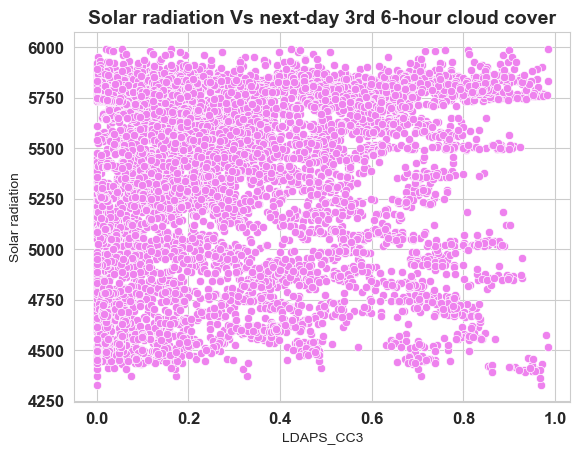

In [34]:
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

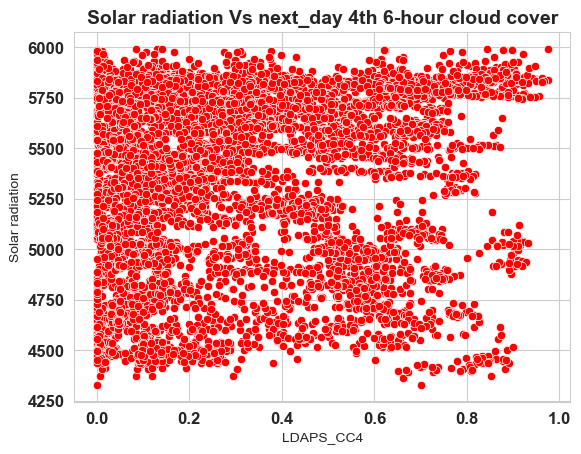

In [35]:
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

# Prespitation VS Solar Radiation

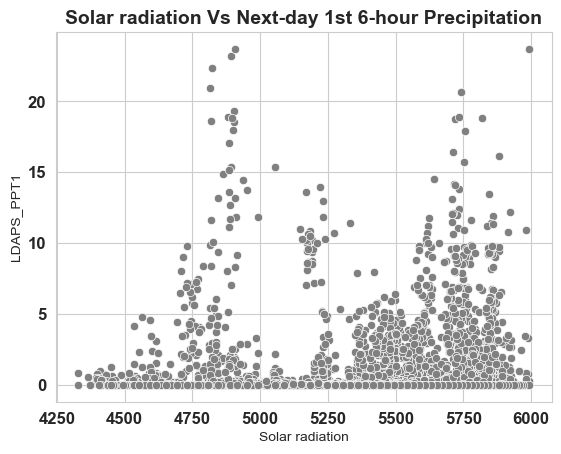

In [36]:
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

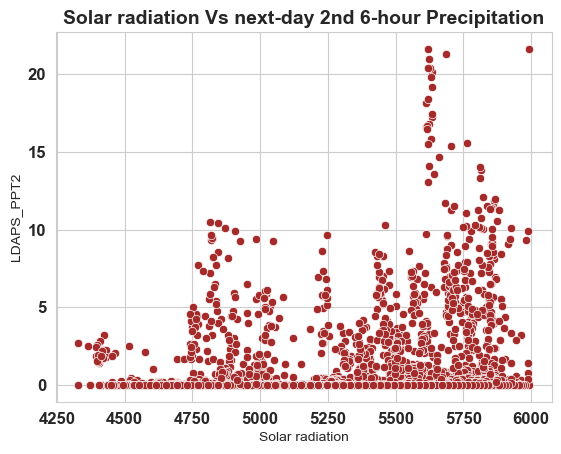

In [37]:
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

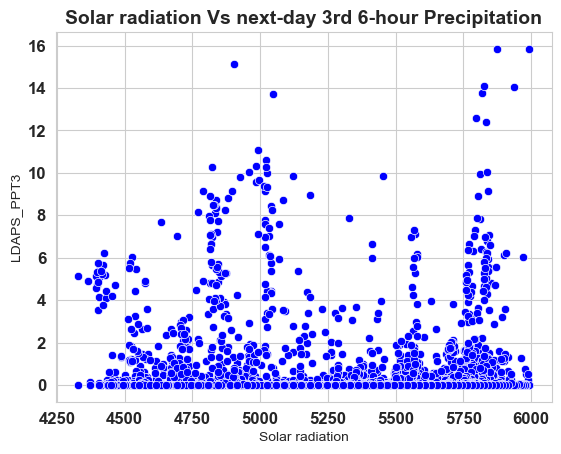

In [38]:
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

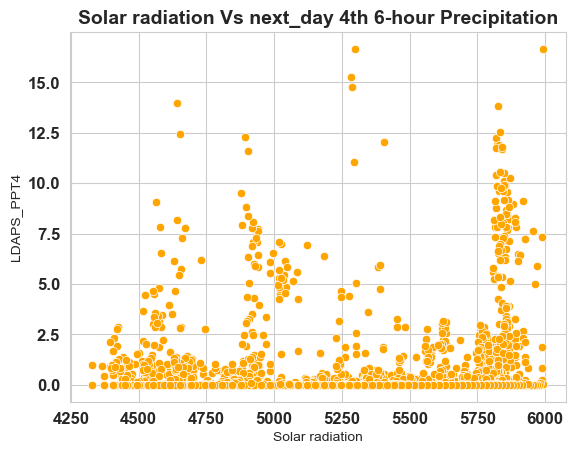

In [39]:
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


Minimum Wind Speed : 0.0 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.029203182535346 m/s


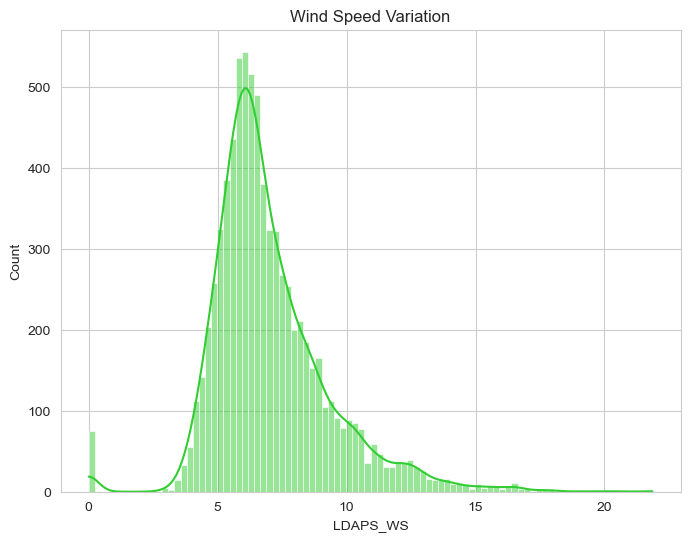

In [40]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

Minimum RHmax is 0.0 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 0.0 % and Maximum RHmin is 98.5247345 %


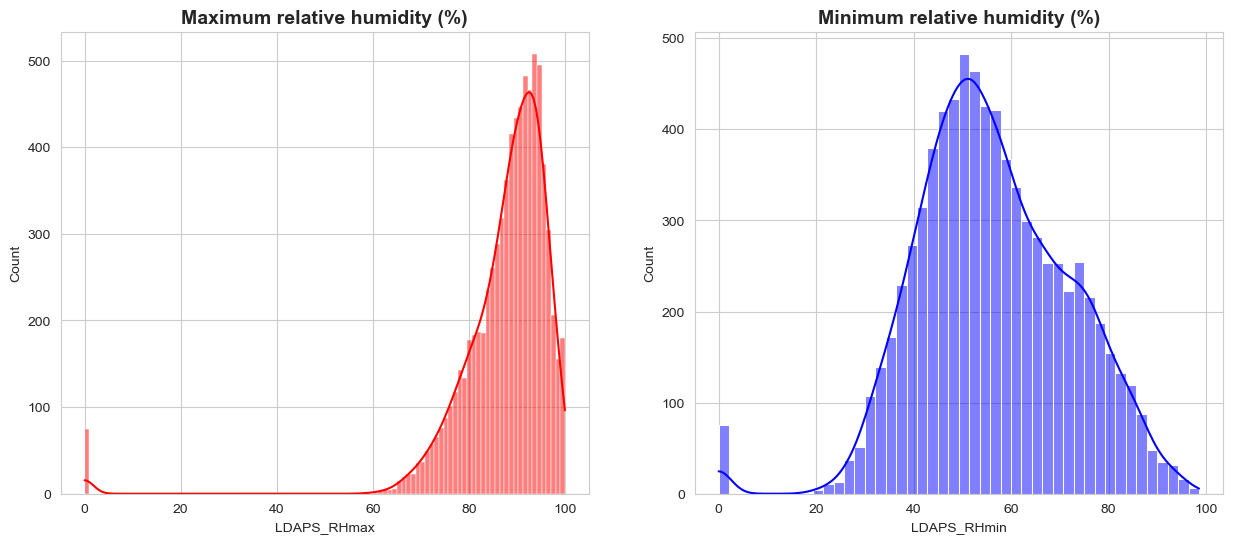

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

Minimum Tmax applied lapse rate is 0.0 (Â°C) and Maximum Tmax applied lapse rate is 38.54225522 (Â°C)
Minimum Tmin is applied lapse rate 0.0 (Â°C) and Maximum Tmin applied lapse rate is 29.61934244 (Â°C)


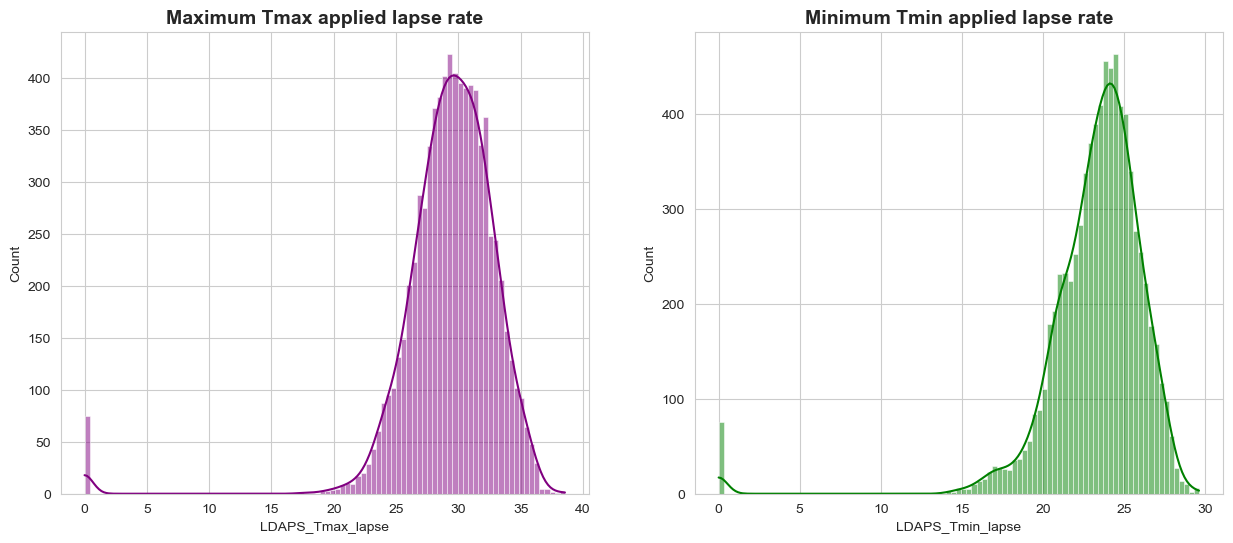

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='purple')
plt.title('Maximum Tmax applied lapse rate',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='green')
plt.title('Minimum Tmin applied lapse rate',fontsize=14, fontweight='bold')
print('Minimum Tmax applied lapse rate is {} (Â°C) and Maximum Tmax applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} (Â°C) and Maximum Tmin applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 61.90028768924239


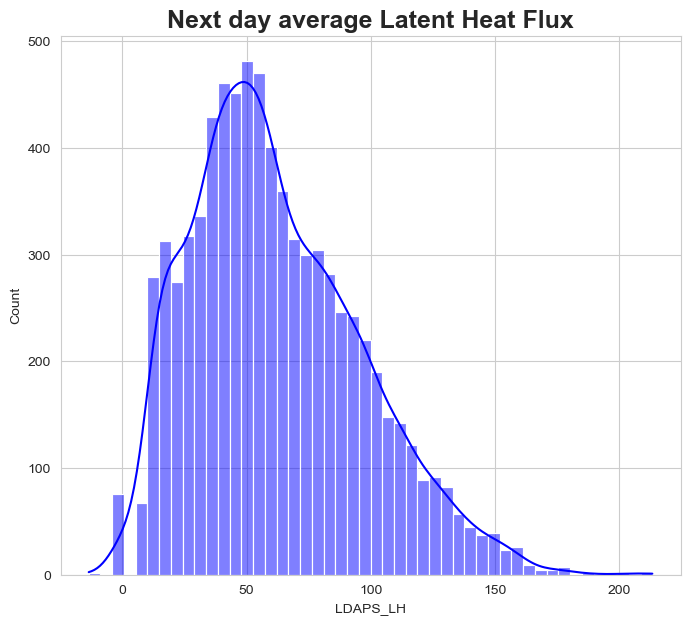

In [43]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',df['LDAPS_LH'].mean())

# Correlation 

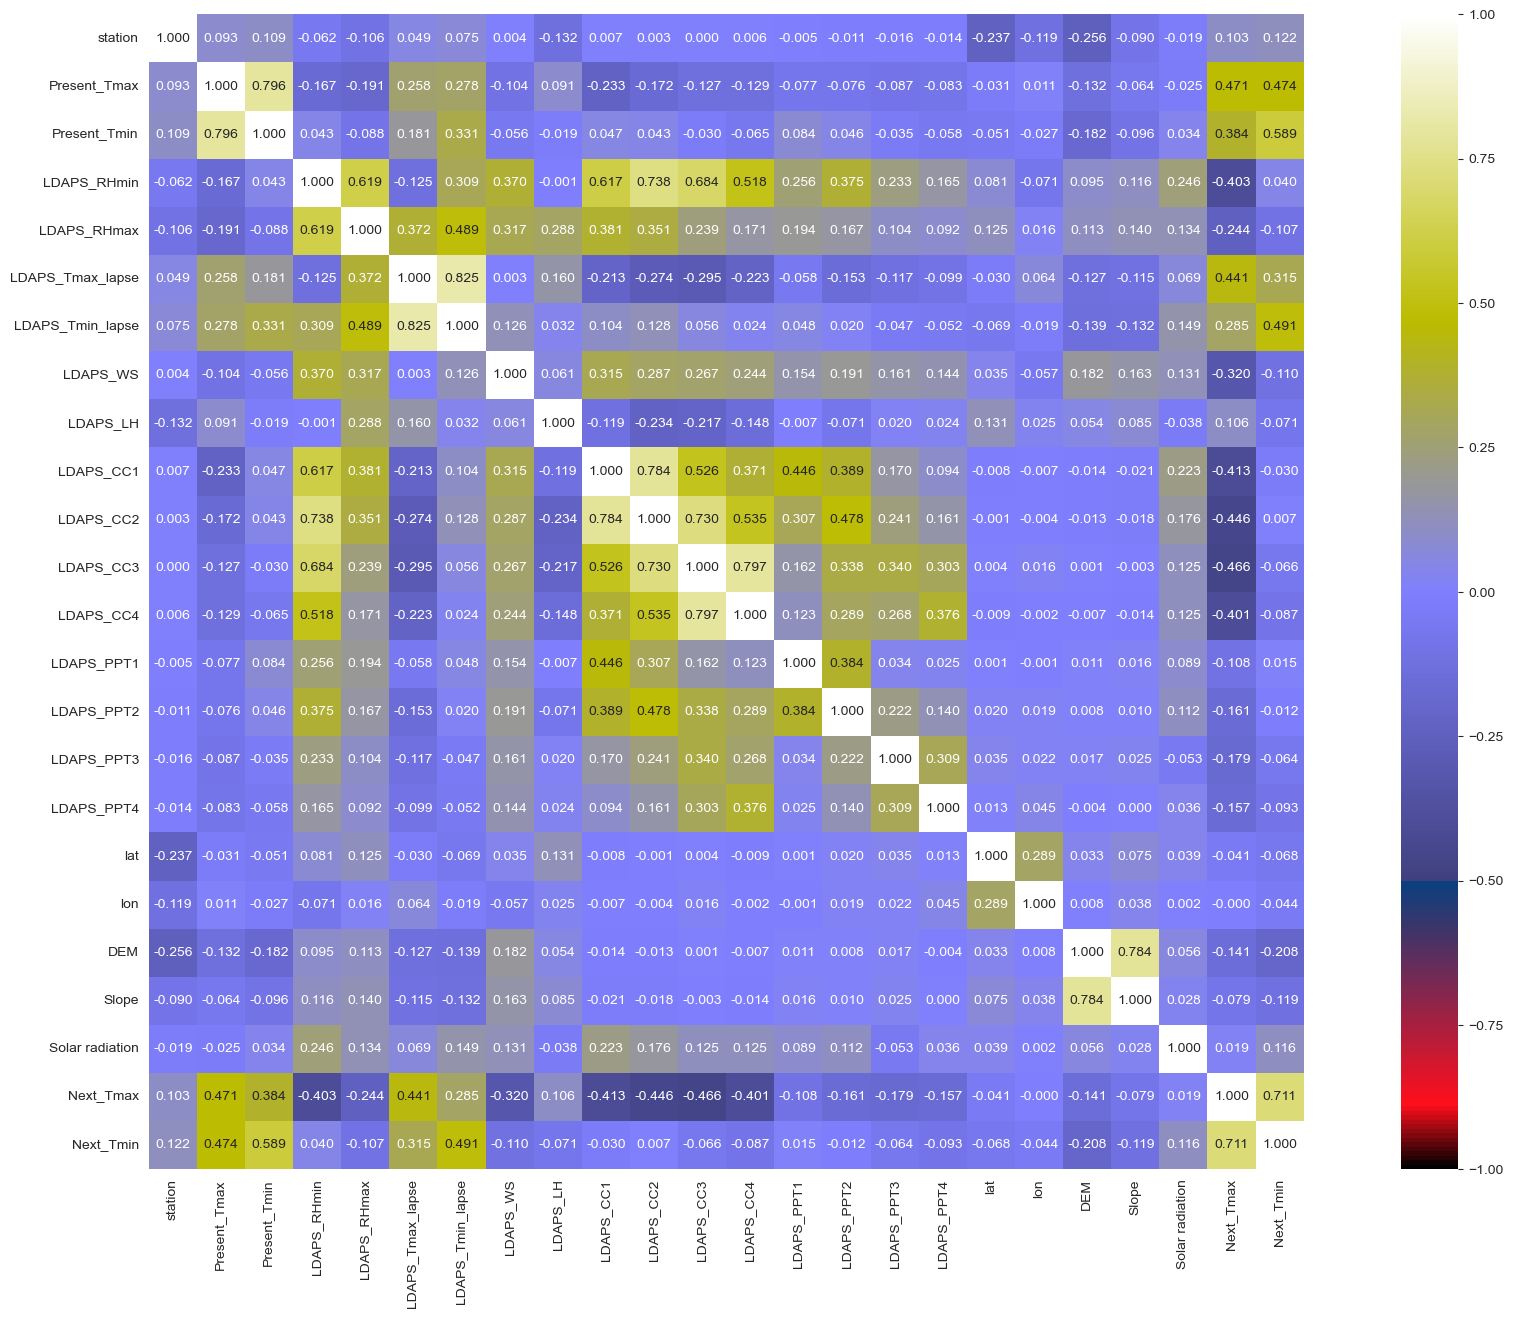

In [44]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")

plt.show()

In [45]:
#Dropping the Unnecessory column
df.drop(['Date'], axis=1, inplace=True)

# Outliers Detection and Removal

In [46]:
df.shape

(7752, 24)

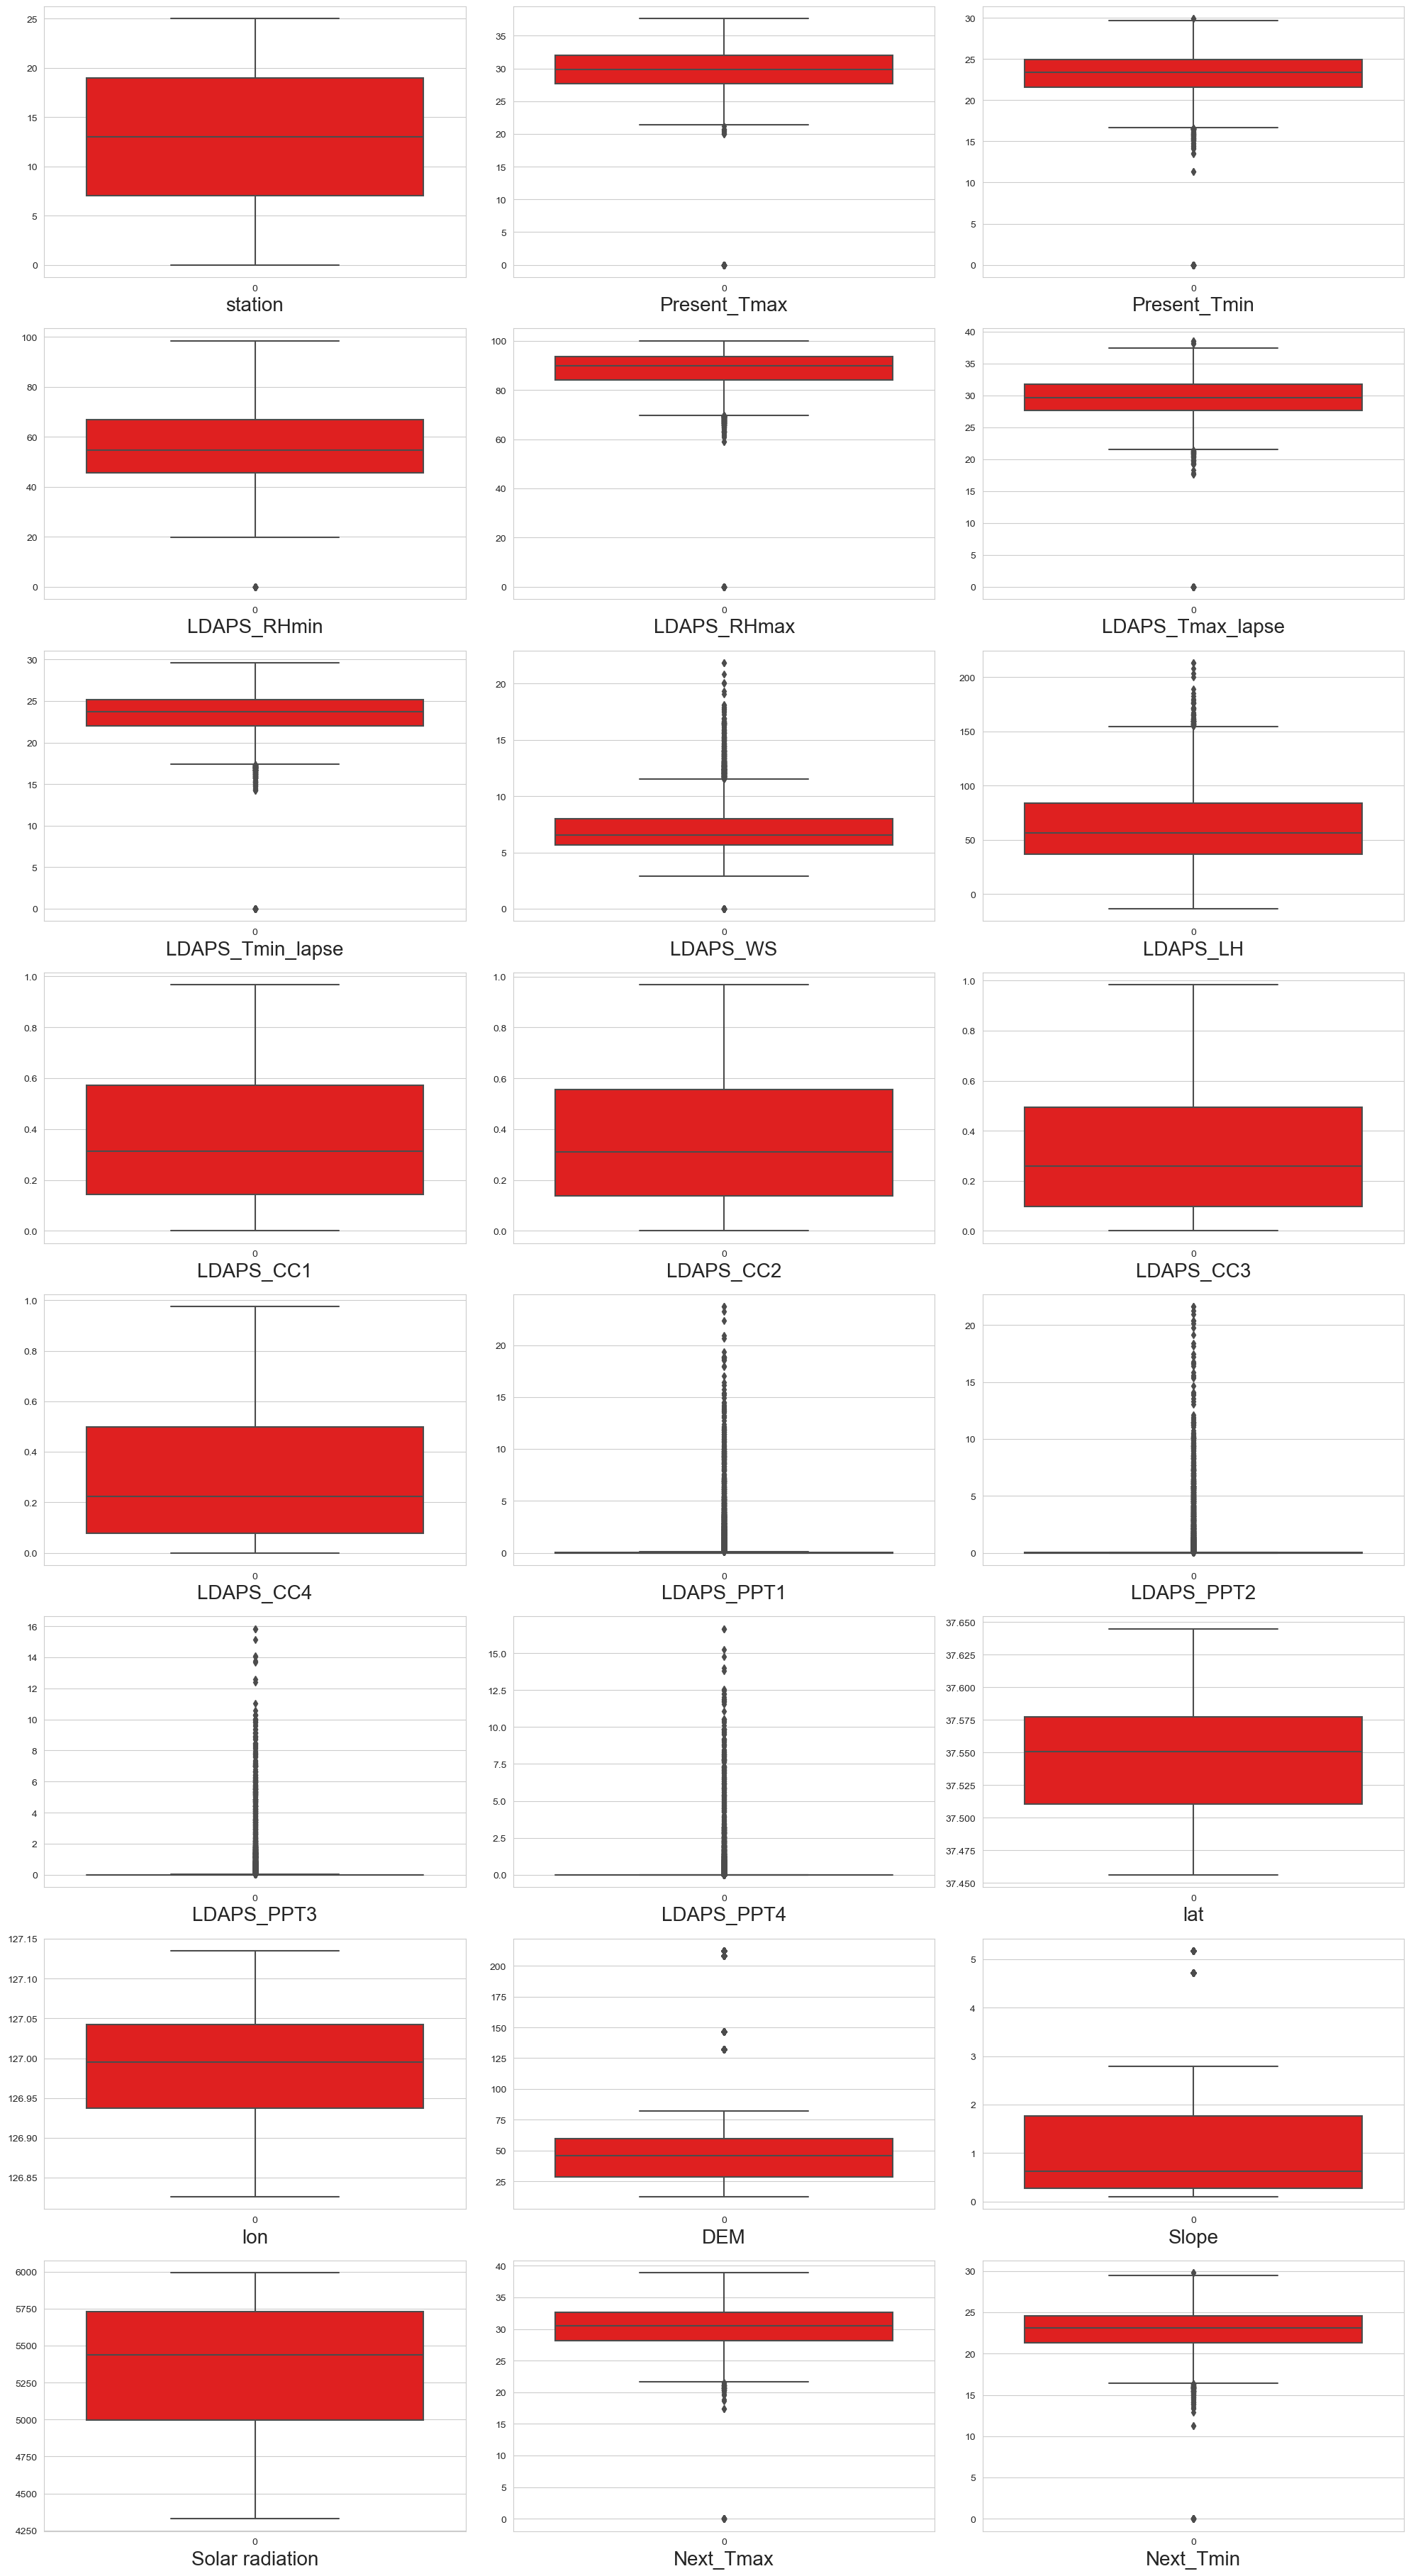

In [47]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=24:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

We can see this there are some outliers are present in the Dataset 

In [48]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)


Shape of the dataframe before removing outliers:  (7752, 24)
Shape of the dataframe after removing outliers:  (6866, 24)
Percentage of data loss post outlier removal:  11.429308565531477


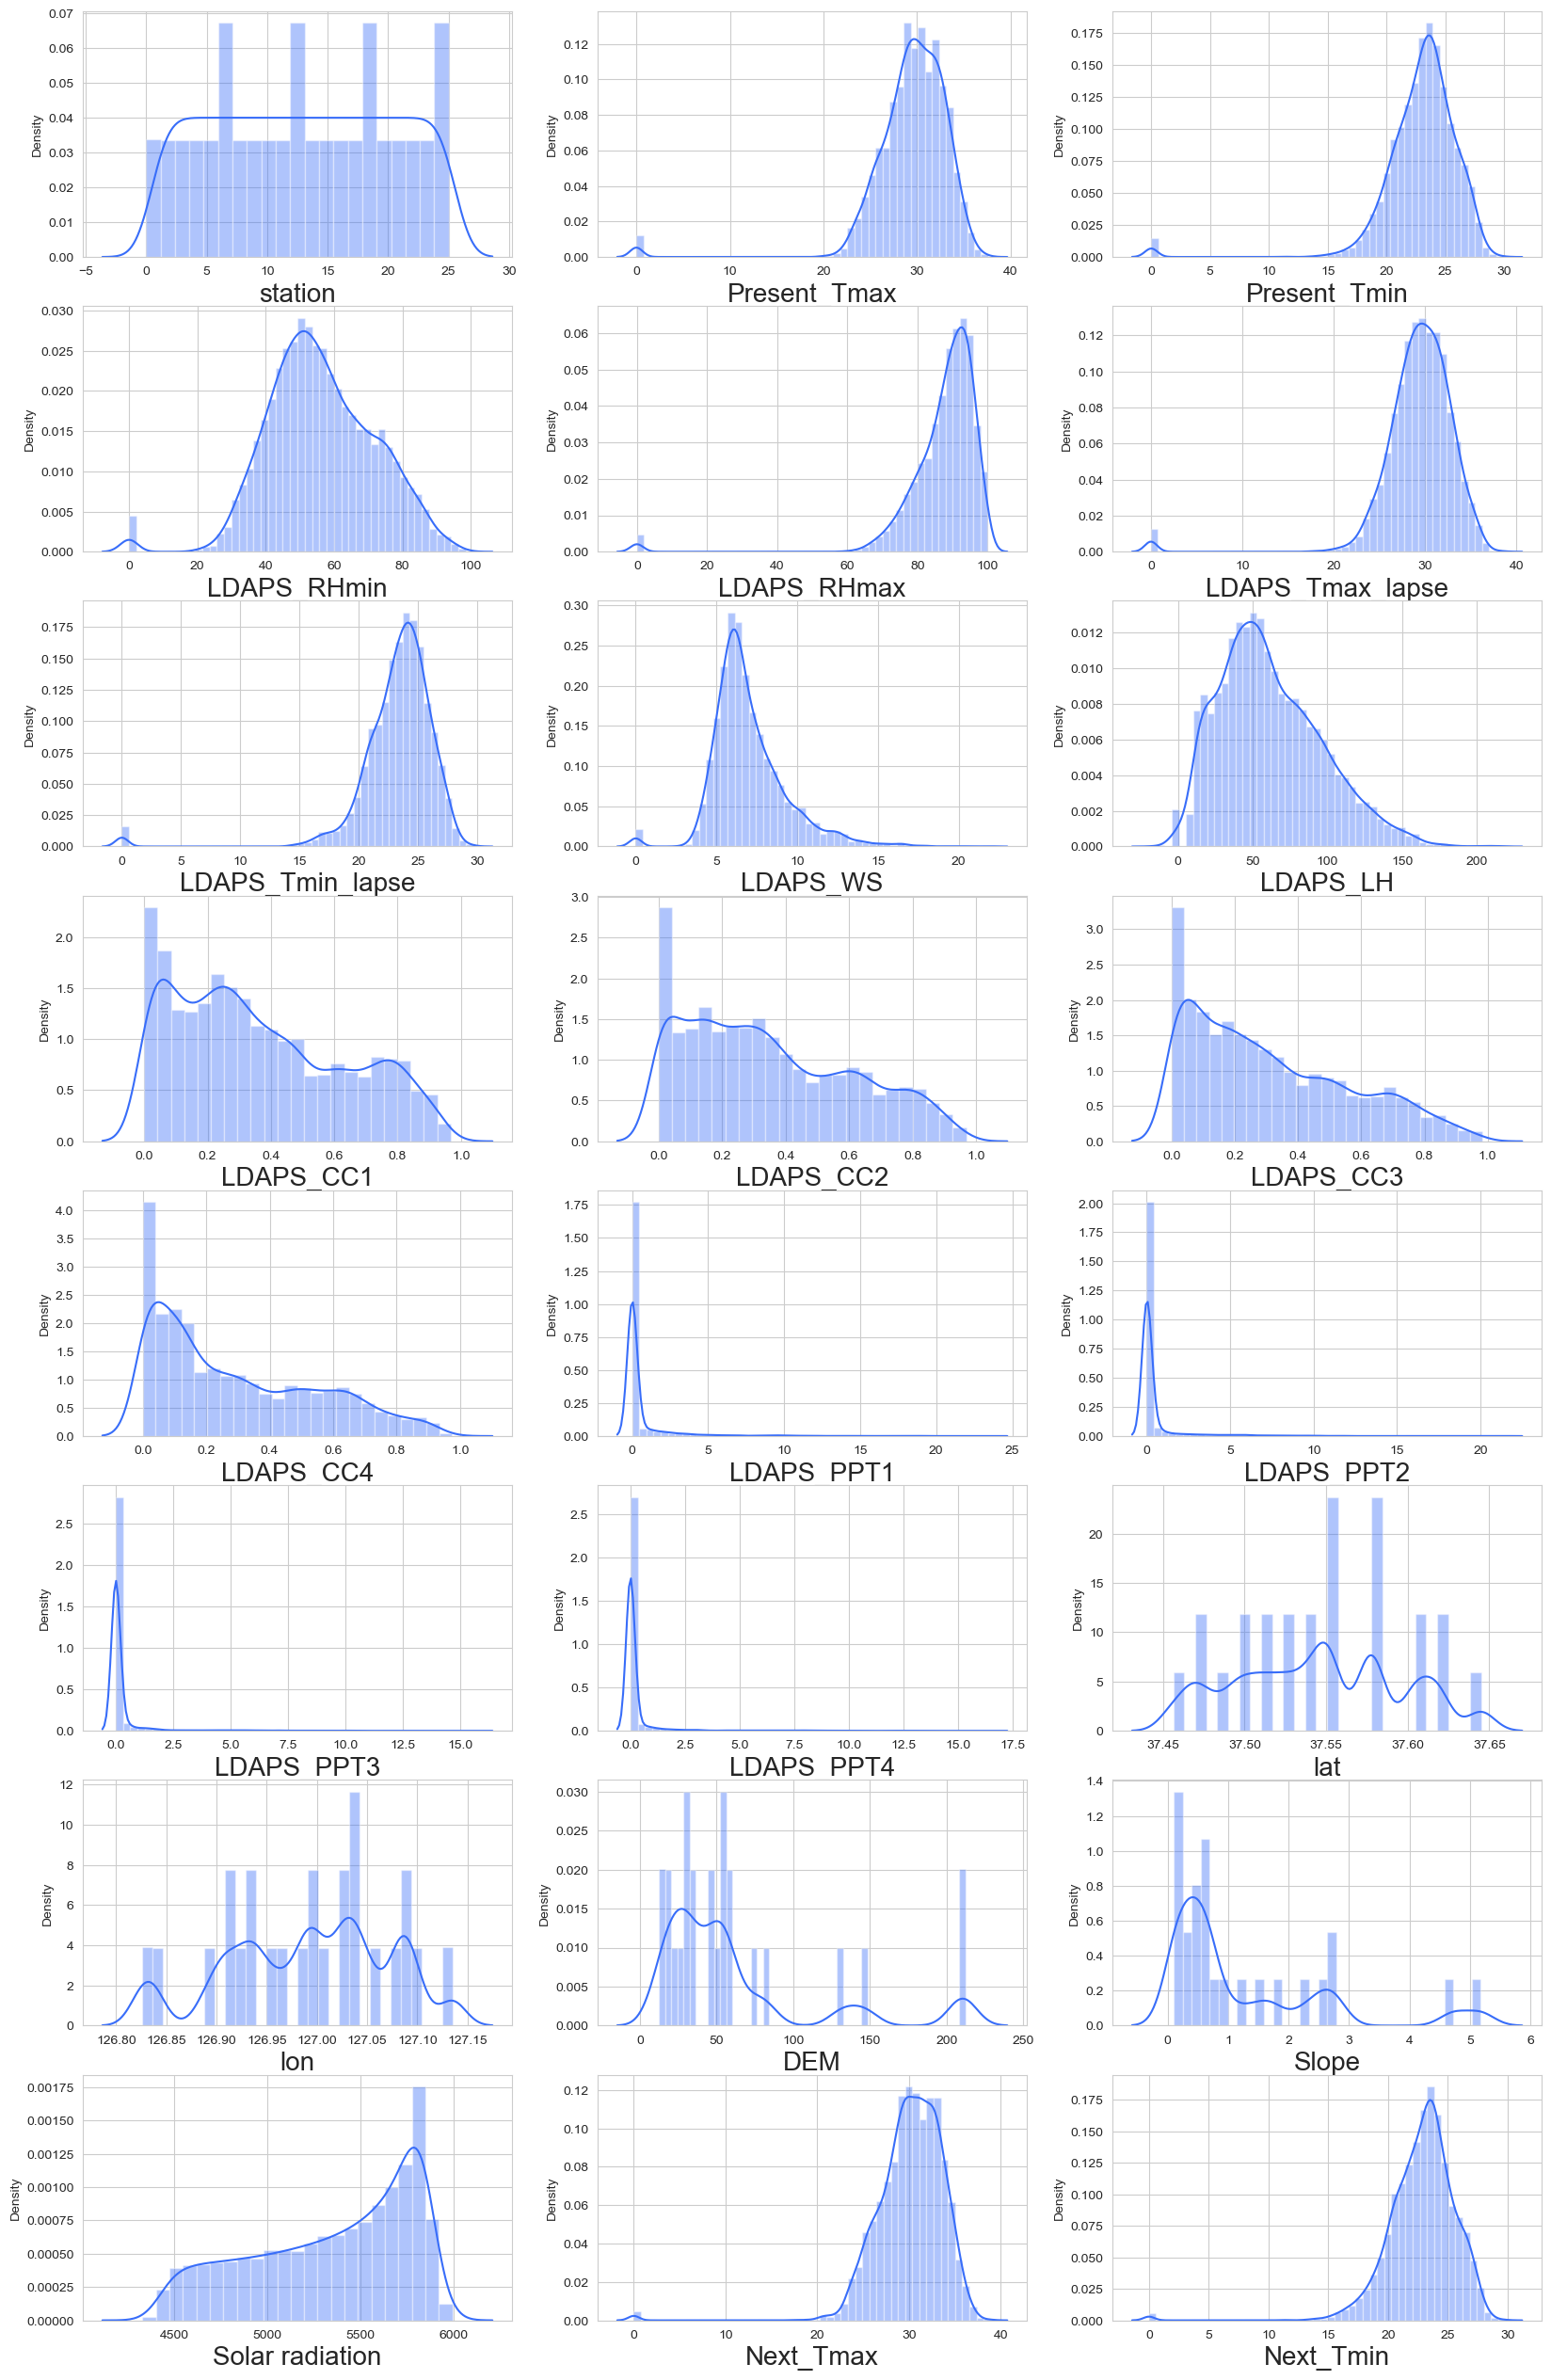

In [49]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=24:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [50]:
df.skew()

station            -0.000115
Present_Tmax       -3.402987
Present_Tmin       -3.232442
LDAPS_RHmin        -0.113889
LDAPS_RHmax        -4.712138
LDAPS_Tmax_lapse   -3.457452
LDAPS_Tmin_lapse   -3.573353
LDAPS_WS            1.163684
LDAPS_LH            0.635208
LDAPS_CC1           0.460727
LDAPS_CC2           0.474379
LDAPS_CC3           0.643064
LDAPS_CC4           0.671739
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -2.213759
Next_Tmin          -2.049088
dtype: float64

In [51]:
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [52]:
df.skew()

station            -0.000115
Present_Tmax       -3.402987
Present_Tmin       -3.232442
LDAPS_RHmin        -0.113889
LDAPS_RHmax        -0.664853
LDAPS_Tmax_lapse   -3.457452
LDAPS_Tmin_lapse   -0.262349
LDAPS_WS            0.260866
LDAPS_LH            0.026160
LDAPS_CC1           0.460727
LDAPS_CC2           0.474379
LDAPS_CC3           0.092567
LDAPS_CC4           0.133773
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
lat                 0.087062
lon                -0.285213
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Next_Tmax          -2.213759
Next_Tmin          -2.049088
dtype: float64

# Model Building

# First Taking the Next_Tmax for the ML Model

In [53]:
X = df1.drop(['Next_Tmax'], axis =1)
Y = df1['Next_Tmax']


In [54]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


from sklearn.ensemble import RandomForestRegressor


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4600, 23)
Training target vector size: (4600,)
Test feature matrix size: (2266, 23)
Test target vector size: (2266,)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8077617160877238 on Random_state 476


# Linear Regression

In [58]:

LR=LinearRegression()
LR.fit(X_train,Y_train)
print(LR.score(X_train,Y_train))
LR_predict=LR.predict(X_test)

0.7919799161950243


In [59]:
print('MSE:',mean_squared_error(LR_predict,Y_test))
print('MAE:',mean_absolute_error(LR_predict,Y_test))
print('r2_score:',r2_score(LR_predict,Y_test))

MSE: 1.8828597887516996
MAE: 1.0454083028858425
r2_score: 0.723993196390543


# Ridge

In [60]:

R=Ridge()
R.fit(X_train,Y_train)
print(R.score(X_train,Y_train))
R_predict=R.predict(X_test)

0.7919797445762815


In [61]:
print('MSE:',mean_squared_error(R_predict,Y_test))
print('MAE:',mean_absolute_error(R_predict,Y_test))
print('r2_score:',r2_score(R_predict,Y_test))

MSE: 1.8829406537932225
MAE: 1.0453996211502683
r2_score: 0.7239130837034635


# SVR

In [62]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(X_train,Y_train)
print(svr.score(X_train,Y_train))
svr_predict=svr.predict(X_test)


0.7876569196731364


In [63]:

print('MSE:',mean_squared_error(svr_predict,Y_test))
print('MAE:',mean_absolute_error(svr_predict,Y_test))
print('r2_score:',r2_score(svr_predict,Y_test))

MSE: 1.9060216396400287
MAE: 1.0421054747174447
r2_score: 0.7283895797914379


(kernel='rbf')

In [64]:

svr_r=SVR(kernel='rbf')
svr_r.fit(X_train,Y_train)
print(svr_r.score(X_train,Y_train))
svrpred_r=svr_r.predict(X_test)


0.8881311282153869


In [65]:

print('MSE:',mean_squared_error(svrpred_r,Y_test))
print('MAE:',mean_absolute_error(svrpred_r,Y_test))
print('r2_score:',r2_score(svrpred_r,Y_test))

MSE: 1.3179269394215691
MAE: 0.834762250949839
r2_score: 0.8106451761389978


# Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(X_train,Y_train)
print(RF.score(X_train,Y_train))
RF_PRED=RF.predict(X_test)


0.9846105434905803


In [67]:
print('MSE:',mean_squared_error(RF_PRED,Y_test))
print('MAE:',mean_absolute_error(RF_PRED,Y_test))
print('r2_score:',r2_score(RF_PRED,Y_test))

MSE: 1.0480227837599292
MAE: 0.7547272727272727
r2_score: 0.8528206764955036


# Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
print(DTR.score(X_train,Y_train))
DTR_PRED=DTR.predict(X_test)

1.0


In [69]:
print('MSE:',mean_squared_error(DTR_PRED,Y_test))
print('MAE:',mean_absolute_error(DTR_PRED,Y_test))
print('r2_score:',r2_score(DTR_PRED,Y_test))

MSE: 2.2710238305383936
MAE: 1.0887908208296557
r2_score: 0.7368839178551845


# Gradient Boost Regressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(X_train,Y_train)
print(GBR.score(X_train,Y_train))
GBR_PRED=GBR.predict(X_test)

0.8814220799991795


In [71]:
print('MSE:',mean_squared_error(GBR_PRED,Y_test))
print('MAE:',mean_absolute_error(GBR_PRED,Y_test))
print('r2_score:',r2_score(GBR_PRED,Y_test))

MSE: 1.3886901225365036
MAE: 0.8953127865224656
r2_score: 0.8016711332726858


# Cross Validation Score

In [72]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, X,Y):
    rmse =- (cross_val_score(model, X,Y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,X,Y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))


LR    : 2.129072, 0.401979
R    : 2.128960, 0.402126
svr    : 2.102563, 0.436210
svr_r    : 2.425650, 0.401943
RF    : 2.329738, 0.418546
DTR    : 4.383949, 0.390165
GBR    : 2.173701, 0.369689


# Hyper Parameter Tunning Using Grid Search CV

In [76]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [78]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5; 1/16

[CV 1/5; 11/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5; 11/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25
[CV 2/5; 11/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5; 11/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25
[CV 3/5; 11/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5; 11/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25
[CV 4/5; 11/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5; 11/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25
[CV 5/5; 11/168] END bootstrap=True, criterion=gini, max_dep

[CV 4/5; 19/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 19/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=50
[CV 5/5; 19/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5; 20/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=60
[CV 1/5; 20/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5; 20/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=60
[CV 2/5; 20/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5; 20/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=60
[CV 3/5; 20/168] END bootstrap=True, criterion=gini,

[CV 5/5; 27/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5; 28/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70
[CV 1/5; 28/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 2/5; 28/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70
[CV 2/5; 28/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 3/5; 28/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70
[CV 3/5; 28/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5; 28/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70
[CV 4/5; 28/168] END bootstrap=True, criterion=gini,

[CV 5/5; 35/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 36/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5
[CV 1/5; 36/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 36/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5
[CV 2/5; 36/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 36/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5
[CV 3/5; 36/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5; 36/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5
[CV 4/5; 36/168] END bootstrap=True, criterion=gini, max_de

[CV 1/5; 47/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5; 47/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50
[CV 2/5; 47/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5; 47/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50
[CV 3/5; 47/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 47/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50
[CV 4/5; 47/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 47/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50
[CV 5/5; 47/168] END bootstrap=True, criterion=gini,

[CV 2/5; 55/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5; 55/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60
[CV 3/5; 55/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5; 55/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60
[CV 4/5; 55/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5; 55/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60
[CV 5/5; 55/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5; 56/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=70
[CV 1/5; 56/168] END bootstrap=True, criterion=gini,

[CV 2/5; 63/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 3/5; 63/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=70
[CV 3/5; 63/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5; 63/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=70
[CV 4/5; 63/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5; 63/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=70
[CV 5/5; 63/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 64/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5
[CV 1/5; 64/168] END bootstrap=True, criterion=gini, 

[CV 5/5; 72/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 1/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=nan total time=   0.0s
[CV 2/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 2/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=nan total time=   0.0s
[CV 3/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 3/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=nan total time=   0.0s
[CV 4/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 4/5; 73/168] END bootstrap=True, criterion=gini,

[CV 3/5; 82/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 82/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50
[CV 4/5; 82/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 82/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50
[CV 5/5; 82/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5; 83/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60
[CV 1/5; 83/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5; 83/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60
[CV 2/5; 83/168] END bootstrap=True, criterion=gini,

[CV 2/5; 90/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5; 90/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60
[CV 3/5; 90/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5; 90/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60
[CV 4/5; 90/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5; 90/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60
[CV 5/5; 90/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5; 91/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=70
[CV 1/5; 91/168] END bootstrap=True,

[CV 2/5; 98/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 3/5; 98/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70
[CV 3/5; 98/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5; 98/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70
[CV 4/5; 98/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5; 98/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70
[CV 5/5; 98/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 99/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=5
[CV 1/5; 99/168] END bootstrap=True,

[CV 5/5; 105/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 106/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5
[CV 1/5; 106/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 106/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5
[CV 2/5; 106/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 106/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5
[CV 3/5; 106/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5; 106/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5
[CV 4/5; 106/168] END boots

[CV 3/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 4/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 5/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=nan total time=   0.0s
[CV 1/5; 117/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 1/5; 117/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5; 117/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 2/5; 117/168] EN

[CV 4/5; 124/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 124/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50
[CV 5/5; 124/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5; 125/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=60
[CV 1/5; 125/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5; 125/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=60
[CV 2/5; 125/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5; 125/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=60
[CV 3/5; 125/168] EN

[CV 3/5; 132/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5; 132/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60
[CV 4/5; 132/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5; 132/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60
[CV 5/5; 132/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5; 133/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=70
[CV 1/5; 133/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 2/5; 133/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=70
[CV 2/5; 133/168] EN

[CV 3/5; 140/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5; 140/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70
[CV 4/5; 140/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5; 140/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70
[CV 5/5; 140/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 141/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=5
[CV 1/5; 141/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 141/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=5
[CV 2/5; 141/168] END b

[CV 2/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 3/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 4/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 5/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5; 150/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15
[CV 1/5; 150/168] EN

[CV 2/5; 159/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5; 159/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50
[CV 3/5; 159/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 159/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50
[CV 4/5; 159/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 159/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50
[CV 5/5; 159/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5; 160/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=60
[CV 1/5; 160/168] EN

[CV 3/5; 167/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5; 167/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60
[CV 4/5; 167/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5; 167/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60
[CV 5/5; 167/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5; 168/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=70
[CV 1/5; 168/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 2/5; 168/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=70
[CV 2/5; 168/168] EN

ValueError: 
All the 840 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 864, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 782, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 572, in __init__
    self.results = batch()
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 263, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 263, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\fixes.py", line 117, in __call__
    return self.function(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 189, in _parallel_build_trees
    tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 394, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'gini'

--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 864, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 782, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 572, in __init__
    self.results = batch()
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 263, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 263, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\fixes.py", line 117, in __call__
    return self.function(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 189, in _parallel_build_trees
    tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 394, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'entropy'


In [80]:
GCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# TAKING 'Next_Tmin' AS TARGET , CREATING CLASSIFICATION MODEL
Dividing data into X and Y

In [81]:
X = df1.drop(['Next_Tmin'], axis =1)
Y = df1['Next_Tmin']


In [82]:
X.shape

(6866, 23)

In [83]:
Y.shape

(6866,)

# scaling X values

In [85]:

from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
X=sc.fit_transform(X)


# Finding best Random state

In [86]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8641776163385883 on Random_state 190


# Spliting Train and Test data¶

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.27,random_state=190)


In [90]:
X_train.shape

(5012, 23)

In [91]:
X_test.shape

(1854, 23)

In [92]:
Y_train.shape

(5012,)

In [93]:
Y_test.shape

(1854,)

# Linear Regression

In [94]:

LR=LinearRegression()
LR.fit(X_train,Y_train)
print(LR.score(X_train,Y_train))
LR_predict=LR.predict(X_test)


0.8422807660944697


In [95]:

print('MSE:',mean_squared_error(LR_predict,Y_test))

print('MAE:',mean_absolute_error(LR_predict,Y_test))

print('r2_score:',r2_score(LR_predict,Y_test))

MSE: 0.8289600865258547
MAE: 0.724493103839948
r2_score: 0.8448371287812784


# Random Forest Regressor

In [96]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
print(rf.score(X_train,Y_train))
rf_predict=rf.predict(X_test)

0.9865196826509723


In [97]:
print('MSE:',mean_squared_error(rf_predict,Y_test))

print('MAE:',mean_absolute_error(rf_predict,Y_test))

print('r2_score:',r2_score(rf_predict,Y_test))

MSE: 0.5288408230852212
MAE: 0.5588824163969797
r2_score: 0.9016915450263641


# DecisionTreeRegressor()

In [98]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train,Y_train)
print(dtc.score(X_train,Y_train))
dtc_predict=dtc.predict(X_test)

1.0


In [99]:
print('MSE:',mean_squared_error(dtc_predict,Y_test))

print('MAE:',mean_absolute_error(dtc_predict,Y_test))

print('r2_score:',r2_score(dtc_predict,Y_test))

MSE: 1.237982740021575
MAE: 0.8307443365695794
r2_score: 0.7934541492921845


# ExtraTreesRegressor()

In [100]:
xt = ExtraTreesRegressor()
xt.fit(X_train,Y_train)
print(xt.score(X_train,Y_train))
xt_predict=xt.predict(X_test)

1.0


In [101]:
print('MSE:',mean_squared_error(xt_predict,Y_test))

print('MAE:',mean_absolute_error(xt_predict,Y_test))

print('r2_score:',r2_score(xt_predict,Y_test))

MSE: 0.4703095933117583
MAE: 0.5240765911542611
r2_score: 0.9124438944355324


# BaggingRegressor()

In [102]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
br.fit(X_train,Y_train)
print(br.score(X_train,Y_train))
br_predict=br.predict(X_test)

0.9798505195133312


In [103]:
print('MSE:',mean_squared_error(br_predict,Y_test))

print('MAE:',mean_absolute_error(br_predict,Y_test))

print('r2_score:',r2_score(br_predict,Y_test))

MSE: 0.5960581445523194
MAE: 0.5929773462783172
r2_score: 0.8904225749989382


# AdaBoostRegressor()

In [104]:
adb=AdaBoostRegressor()
adb.fit(X_train,Y_train)
print(adb.score(X_train,Y_train))
adb_predict=adb.predict(X_test)

0.8215135853611923


In [105]:
print('MSE:',mean_squared_error(adb_predict,Y_test))

print('MAE:',mean_absolute_error(adb_predict,Y_test))

print('r2_score:',r2_score(adb_predict,Y_test))

MSE: 1.0541205993460143
MAE: 0.8344694213709607
r2_score: 0.7682581530749519


# GradientBoostingRegressor()

In [106]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
print(gbr.score(X_train,Y_train))
gbr_predict=gbr.predict(X_test)

0.9080899330150991


In [107]:
print('MSE:',mean_squared_error(gbr_predict,Y_test))

print('MAE:',mean_absolute_error(gbr_predict,Y_test))

print('r2_score:',r2_score(gbr_predict,Y_test))

MSE: 0.5891446180403332
MAE: 0.6100709609005465
r2_score: 0.8902034432900631


# Hyper Parameter Tunning

In [108]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}


In [111]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5; 1/16

[CV 5/5; 10/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 1/5; 11/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25
[CV 1/5; 11/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5; 11/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25
[CV 2/5; 11/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5; 11/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25
[CV 3/5; 11/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5; 11/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=25
[CV 4/5; 11/168] END bootstrap=True, criterion=gini, max_dep

[CV 4/5; 19/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 19/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=50
[CV 5/5; 19/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5; 20/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=60
[CV 1/5; 20/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5; 20/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=60
[CV 2/5; 20/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5; 20/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=60
[CV 3/5; 20/168] END bootstrap=True, criterion=gini,

[CV 4/5; 27/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5; 27/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60
[CV 5/5; 27/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5; 28/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70
[CV 1/5; 28/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 2/5; 28/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70
[CV 2/5; 28/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 3/5; 28/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70
[CV 3/5; 28/168] END bootstrap=True, criterion=gini,

[CV 3/5; 35/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5; 35/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=70
[CV 4/5; 35/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5; 35/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=70
[CV 5/5; 35/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 36/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5
[CV 1/5; 36/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 36/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5
[CV 2/5; 36/168] END bootstrap=True, criterion=gini, ma

[CV 4/5; 42/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5; 42/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=70
[CV 5/5; 42/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 43/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5
[CV 1/5; 43/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 43/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5
[CV 2/5; 43/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 43/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5
[CV 3/5; 43/168] END bootstrap=True, criterion=gini, max_

[CV 5/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 1/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 1/5; 53/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 2/5; 53/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 3/5; 53/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 4/5; 53/168] END bootstrap=True, criterion=gini,

[CV 4/5; 61/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 61/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=50
[CV 5/5; 61/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5; 62/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=60
[CV 1/5; 62/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5; 62/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=60
[CV 2/5; 62/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5; 62/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=60
[CV 3/5; 62/168] END bootstrap=True, criterion=gini,

[CV 2/5; 70/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 3/5; 70/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70
[CV 3/5; 70/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5; 70/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70
[CV 4/5; 70/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5; 70/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70
[CV 5/5; 70/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 71/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5
[CV 1/5; 71/168] END bootstrap=True, criterion=gini, 

[CV 3/5; 79/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5; 79/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10
[CV 4/5; 79/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5; 79/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10
[CV 5/5; 79/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 1/5; 80/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 2/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 2/5; 80/168] END bootstrap=True, criterion=gini,

[CV 3/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 4/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 5/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5; 90/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60
[CV 1/5; 90/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5; 90/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=60
[CV 2/5; 90/168] END bootstrap=True,

[CV 5/5; 97/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5; 98/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70
[CV 1/5; 98/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 2/5; 98/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70
[CV 2/5; 98/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 3/5; 98/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70
[CV 3/5; 98/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5; 98/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=70
[CV 4/5; 98/168] END bootstrap=True,

[CV 5/5; 105/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 106/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5
[CV 1/5; 106/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 106/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5
[CV 2/5; 106/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 106/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5
[CV 3/5; 106/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5; 106/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5
[CV 4/5; 106/168] END boots

[CV 4/5; 112/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5; 112/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=70
[CV 5/5; 112/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 113/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=5
[CV 1/5; 113/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 113/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=5
[CV 2/5; 113/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 113/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=5
[CV 3/5; 113/168] END boo

[CV 1/5; 122/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 2/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 2/5; 122/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 3/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 3/5; 122/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 4/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 4/5; 122/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 5/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 5/5; 122/168] EN

[CV 3/5; 131/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 131/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50
[CV 4/5; 131/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 131/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50
[CV 5/5; 131/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5; 132/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60
[CV 1/5; 132/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5; 132/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=60
[CV 2/5; 132/168] EN

[CV 5/5; 139/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5; 140/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70
[CV 1/5; 140/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 2/5; 140/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70
[CV 2/5; 140/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 3/5; 140/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70
[CV 3/5; 140/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5; 140/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70
[CV 4/5; 140/168] EN

[CV 4/5; 147/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5; 147/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=70
[CV 5/5; 147/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 148/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=5
[CV 1/5; 148/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 148/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=5
[CV 2/5; 148/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 148/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=5
[CV 3/5; 148/168] END boo

[CV 3/5; 154/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5; 154/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=70
[CV 4/5; 154/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5; 154/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=70
[CV 5/5; 154/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 155/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=5
[CV 1/5; 155/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 155/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=5
[CV 2/5; 155/168] END b

[CV 3/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 4/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 5/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5; 164/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15
[CV 1/5; 164/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 2/5; 164/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15
[CV 2/5; 164/168] EN

ValueError: 
All the 840 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 864, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 782, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 572, in __init__
    self.results = batch()
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 263, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 263, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\fixes.py", line 117, in __call__
    return self.function(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 189, in _parallel_build_trees
    tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 394, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'gini'

--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 864, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 782, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 572, in __init__
    self.results = batch()
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 263, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 263, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\fixes.py", line 117, in __call__
    return self.function(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 189, in _parallel_build_trees
    tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 394, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'entropy'


In [112]:
GCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [116]:

Final_mod = AdaBoostRegressor(bootstrap=True,criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

TypeError: AdaBoostRegressor.__init__() got an unexpected keyword argument 'bootstrap'

# Saving Final Regression Model For Next_Tmin

In [113]:

import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

NameError: name 'Final_mod' is not defined